# <center>Breast Cancer Classification Using Deep Learning</center>

***Two types of the tumor:***
***1. Benign tumor***

    -Non cancerous
    -Capsulalet
    -Slow Growing
    -Do not metastasize(spread to other parts of the body)
    -Normal cell

***2. Malignant tumor***

    -Cancerous tumor
    -Non-capsulated
    -It's grow faster
    -Maetastasize(spread) to other parts of the body
    -Large cells, dark nuclei and shape are abnormal

   ***Medical Procedere by docters:*** Fine needle aspiration is a type of biopsy procedure. In this procedure, needle is inserted into an area of abnormal tissue or body fluid.


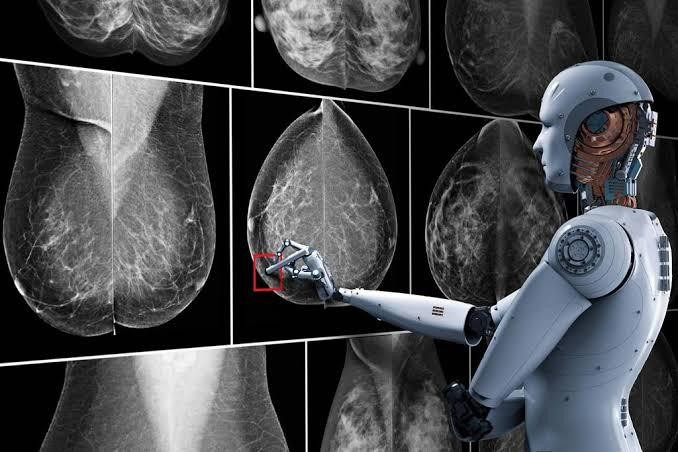

In [201]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [202]:
#In this program Benign's prediction is represented as 1 and for the Malignant is 0.

Data Collection & Processing

In [203]:
#loading the breastdata from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [204]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [205]:
#loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [206]:
# print the first 3 rows
data_frame.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [207]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [208]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [209]:
#number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [210]:
#To see the information of the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [211]:
# To see the missing values in the dataset
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [212]:
#statistical measures describe()
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [213]:
#checking the distribution of Target Varibale
data_frame['label'].value_counts()  #target variable are knowns as dependent variables

1    357
0    212
Name: label, dtype: int64

In [214]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


###Separating the features and target

In [215]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [216]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [217]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


###Splitting the data into Training data & Testing data

In [218]:
#defining the test size and random state of the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [219]:
print(X.shape, X_train.shape, X_test.shape)  #checking the shape of the splitted dataset

(569, 30) (455, 30) (114, 30)


###Standardize the dataset

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
scaler = StandardScaler().fit(X_train)

In [222]:
scaler = StandardScaler()
scaler.fit(X_train)  #fitting the model

StandardScaler()

In [223]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**Building the Neural Network**

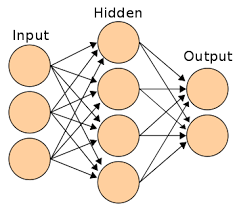

In [224]:
#importing tensorflow and Keras
import tensorflow as tf

#seeds for the reproducability in ML
tf.random.set_seed(3) #function that allows you to set the seed for the random number generators used by TensorFlow operations.
from tensorflow import keras

In [225]:
#setting up the layers of Neural Network usindg keras' sequential class
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [226]:
#compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [227]:
#training the Neural Network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 0.7412 - accuracy: 0.5037 - val_loss: 0.5209 - val_accuracy: 0.7174
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5238 - accuracy: 0.7384 - val_loss: 0.3558 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8729 - val_loss: 0.2639 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2962 - accuracy: 0.8924 - val_loss: 0.2118 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.9242 - val_loss: 0.1800 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2047 - accuracy: 0.9389 - val_loss: 0.1590 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1799 - accuracy: 0.9535 - val_loss: 0.1440 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

###Visualizing accuracy and loss of the model

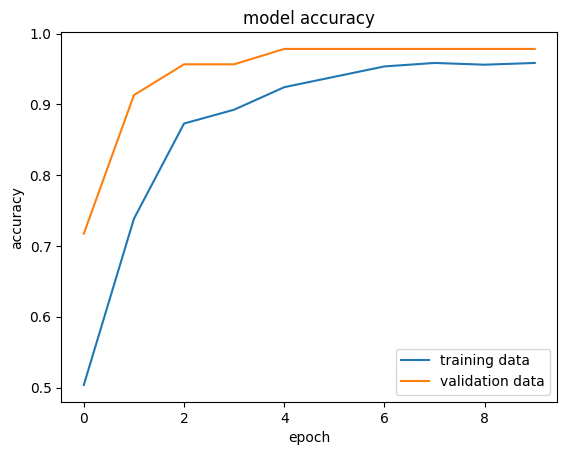

In [228]:
plt.plot(history.history['accuracy'])   # visualizing the plot using matplotlib library
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

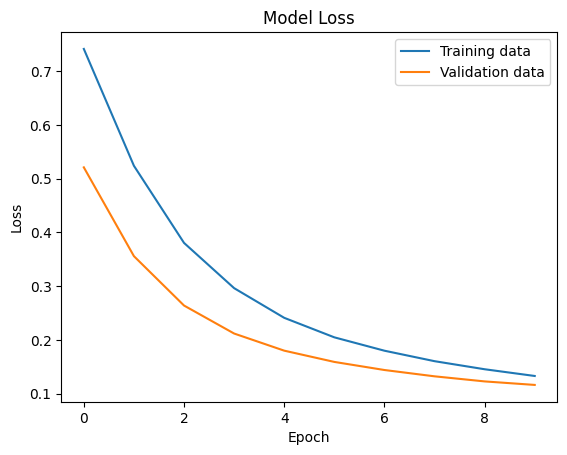

In [229]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training data', 'Validation data'], loc = 'upper right')

Accuracy of the model on test data

In [230]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)  #model's test accuracy evaluation

4/4 [==============================] - 0s 4ms/step - loss: 0.1413 - accuracy: 0.9649
0.9649122953414917


In [231]:
print(X_test_std.shape)  # test data shape
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [232]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 5ms/step


In [233]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.34462377 0.6250895 ]


In [234]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [235]:
print(Y_pred)

[[3.44623774e-01 6.25089526e-01]
 [4.46261346e-01 4.82133180e-01]
 [5.16323186e-02 8.05324554e-01]
 [5.96056581e-01 4.46408558e-06]
 [4.45344150e-01 5.41085541e-01]
 [5.97270846e-01 7.26892322e-04]
 [3.54409397e-01 6.87099993e-01]
 [3.72156538e-02 6.61683619e-01]
 [1.21570244e-01 7.07796931e-01]
 [5.92359044e-02 7.66243219e-01]
 [2.99418151e-01 3.74631882e-01]
 [9.46298689e-02 5.91220856e-01]
 [3.91925633e-01 6.74741626e-01]
 [3.41183931e-01 5.61402261e-01]
 [1.10865116e-01 8.15840185e-01]
 [6.93110943e-01 5.49136288e-03]
 [2.72452254e-02 7.29641140e-01]
 [8.89725536e-02 8.77138853e-01]
 [1.56167567e-01 9.01778102e-01]
 [5.38726926e-01 1.15267206e-02]
 [5.55760376e-02 1.12001032e-01]
 [3.13383006e-02 7.49773979e-01]
 [3.53647023e-02 6.84994578e-01]
 [3.24279480e-02 8.00003827e-01]
 [2.91935265e-01 6.50502384e-01]
 [7.26356387e-01 1.93119720e-02]
 [1.17653497e-01 6.89286113e-01]
 [3.23507041e-01 5.37829578e-01]
 [7.69513369e-01 1.74870528e-02]
 [7.12629080e-01 9.26283468e-03]
 [6.351990

In [236]:
model.predict(X) #gives the prediction probability of each class for that data point

18/18 [==============================] - 0s 2ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [237]:
#argmax-mathematical operation that returns the argument (input value) at which a given function achieves its maximum value.
my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [238]:
#converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


**Building the predictive system**

In [243]:
input_data = (7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039)

#change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#For the one data point reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data using scaler transform
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print("Diagnosed with a Malignant tumor, it's crucial to see your doctor promptly for personalized guidance and potential treatment options to ensure optimal health outcomes. Early consultation allows for careful monitoring and timely intervention if necessary")

else:
  print("Diagnosed with a benign tumor, it's crucial to see your doctor promptly for personalized guidance and potential treatment options to ensure optimal health outcomes. Early consultation allows for careful monitoring and timely intervention if necessary")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
[[0.01255904 0.67427695]]
[1]
Diagnosed with a benign tumor, it's crucial to see your doctor promptly for personalized guidance and potential treatment options to ensure optimal health outcomes. Early consultation allows for careful monitoring and timely intervention if necessary
